In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib.ticker import MultipleLocator


def plot_completion_curves(
    file_paths,
    curve_names,
    title="Time to Completion",
    aggregation="median",
    save_path=None,
    show_plot=True,
):
    """
    Plot completion time curves for multiple models/files.
    Same as plot_ttft_curves but uses times_to_completion column.
    """
    plt.figure(figsize=(12, 8))
    colors = plt.cm.Set1(np.linspace(0, 1, len(file_paths)))

    for i, (file_path, curve_name) in enumerate(zip(file_paths, curve_names)):
        # Read all runs for this model
        pattern = file_path.replace("_run_1.csv", "_run_*.csv")
        run_files = glob.glob(pattern)

        if not run_files:
            run_files = [file_path]  # fallback to single file

        # Load all runs
        all_runs = []
        for run_file in run_files:
            df = pd.read_csv(run_file)
            # Convert to milliseconds - using completion time instead of TTFT
            completion_ms = df["times_to_completion"] * 1000
            all_runs.append(completion_ms.values)

        # Ensure all runs have the same length (should be 60 turns)
        min_length = min(len(run) for run in all_runs)
        all_runs = [run[:min_length] for run in all_runs]
        all_runs = np.array(all_runs)

        # Create turn numbers (1 to N)
        turns = np.arange(1, min_length + 1)

        if aggregation == "median":
            values = np.median(all_runs, axis=0)
            plt.plot(turns, values, label=curve_name, color=colors[i], linewidth=2)

        elif aggregation == "mean":
            values = np.mean(all_runs, axis=0)
            plt.plot(turns, values, label=curve_name, color=colors[i], linewidth=2)

        elif aggregation == "region":
            median_vals = np.median(all_runs, axis=0)
            min_val = np.min(all_runs, axis=0)
            max_val = np.max(all_runs, axis=0)

            plt.plot(turns, median_vals, label=curve_name, color=colors[i], linewidth=2)
            plt.fill_between(turns, min_val, max_val, color=colors[i], alpha=0.2)

    plt.xlabel("Turn (1-60)")
    plt.ylabel("Time to Completion (ms)")
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Set y-axis ticks every 1000ms
    plt.gca().yaxis.set_major_locator(MultipleLocator(1000))

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")

    if show_plot:
        plt.show()

    return plt.gcf()

# General Time to Completion Comparison

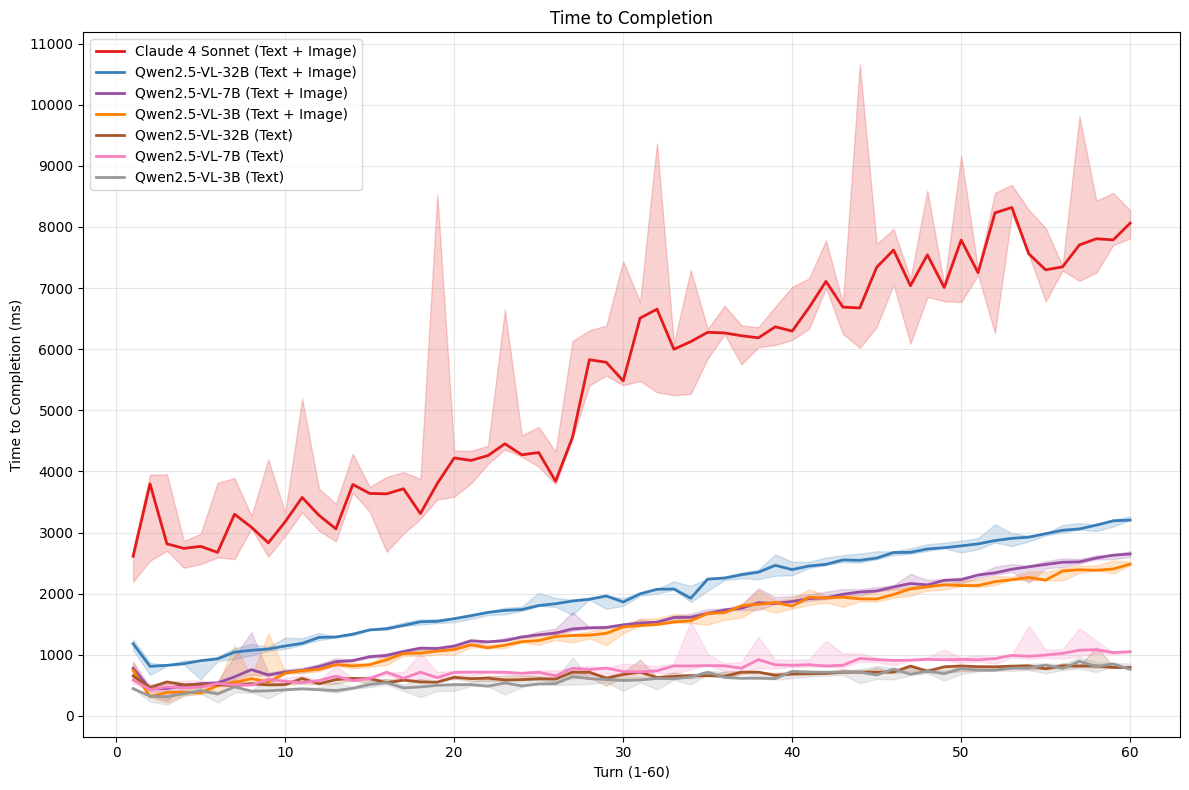

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
completion_files = [
    "results\claude-sonnet-4-20250514_results_run_1.csv",

    "results\qwen2.5_vl_32b_instruct_results_run_1.csv",
    "results\qwen2.5_vl_7b_instruct_results_run_1.csv",
    "results\qwen2.5_vl_3b_instruct_results_run_1.csv",

    "results\qwen2.5_vl_32b_4x_gpu_instruct_text_only_results_run_1.csv",
    "results\qwen2.5_vl_7b_instruct_text_only_results_run_1.csv",
    "results\qwen2.5_3B_instruct_text_only_results_run_1.csv",
]

completion_names = [
    "Claude 4 Sonnet (Text + Image)",
    "Qwen2.5-VL-32B (Text + Image)",
    "Qwen2.5-VL-7B (Text + Image)",
    "Qwen2.5-VL-3B (Text + Image)",

    "Qwen2.5-VL-32B (Text)",
    "Qwen2.5-VL-7B (Text)",
    "Qwen2.5-VL-3B (Text)",
]

plot_completion_curves(completion_files, completion_names, aggregation="region")

# 2xGPU vs. 4xGPU

Both using Tensor Parallel

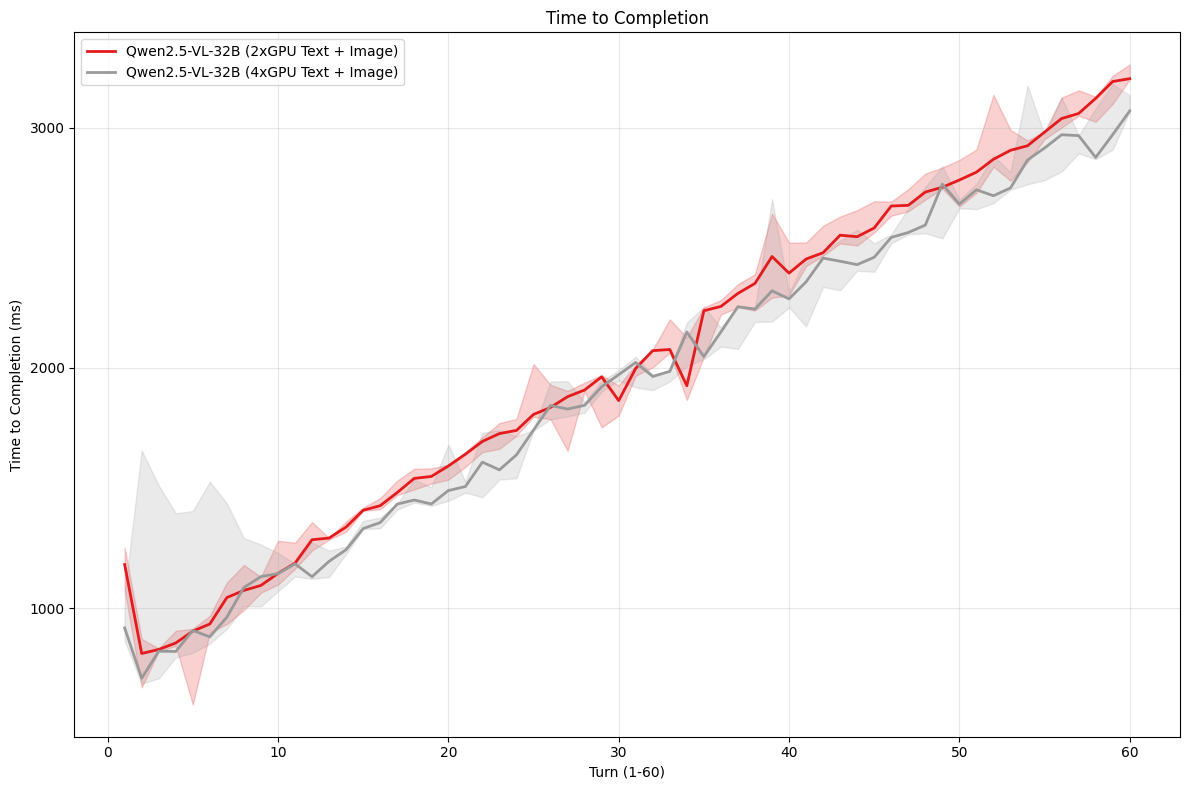

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
completion_files = [
    "results\qwen2.5_vl_32b_instruct_results_run_1.csv",
    "results\qwen2.5_vl_32b_4x_gpu_instruct_results_run_1.csv",
]

completion_names = [
    "Qwen2.5-VL-32B (2xGPU Text + Image)",
    "Qwen2.5-VL-32B (4xGPU Text + Image)",
]

plot_completion_curves(completion_files, completion_names, aggregation="region")

# Text + Image vs Text Only

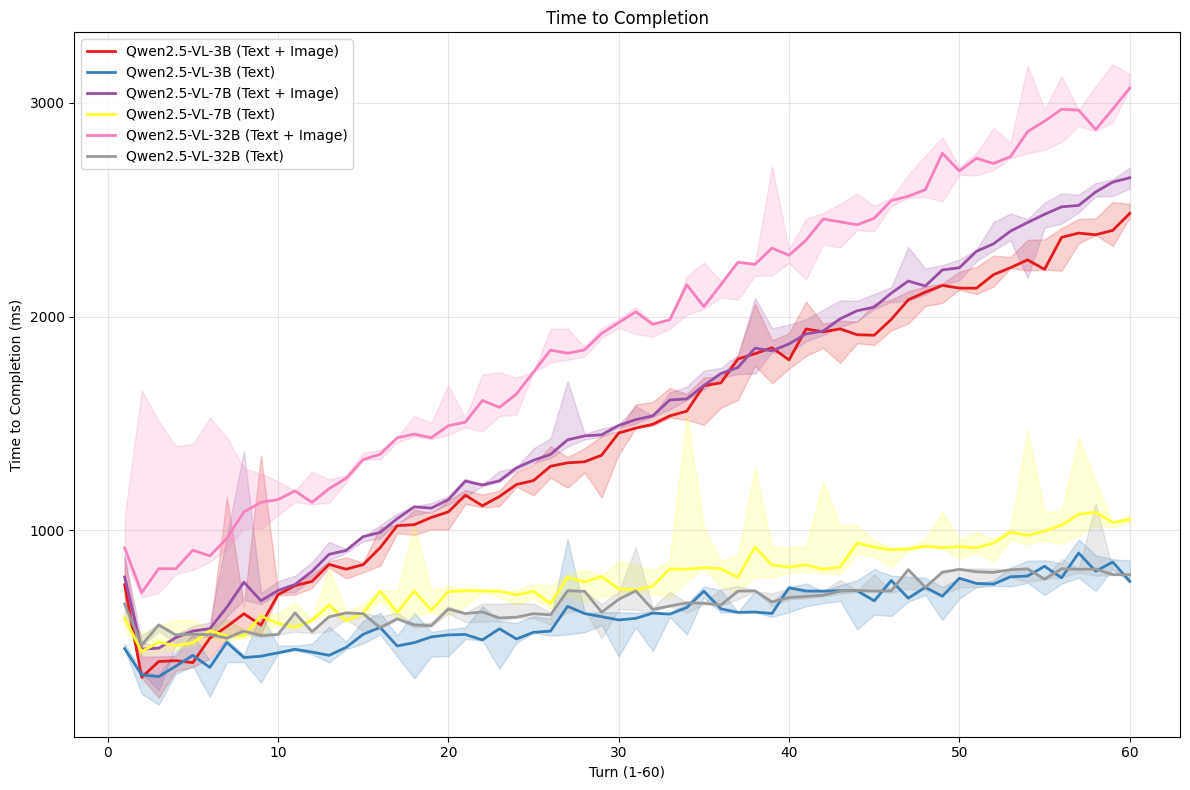

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
completion_files = [
    "results\qwen2.5_vl_3b_instruct_results_run_1.csv",
    "results\qwen2.5_3B_instruct_text_only_results_run_1.csv",

    "results\qwen2.5_vl_7b_instruct_results_run_1.csv",
    "results\qwen2.5_vl_7b_instruct_text_only_results_run_1.csv",

    "results\qwen2.5_vl_32b_4x_gpu_instruct_results_run_1.csv",
    "results\qwen2.5_vl_32b_4x_gpu_instruct_text_only_results_run_1.csv",
]

completion_names = [
    "Qwen2.5-VL-3B (Text + Image)",
    "Qwen2.5-VL-3B (Text)",

    "Qwen2.5-VL-7B (Text + Image)",
    "Qwen2.5-VL-7B (Text)",

    "Qwen2.5-VL-32B (Text + Image)",
    "Qwen2.5-VL-32B (Text)",
]

plot_completion_curves(completion_files, completion_names, aggregation="region")

# Request Localhost vs Over Internet

Having vLLM server on same node vs over the internet

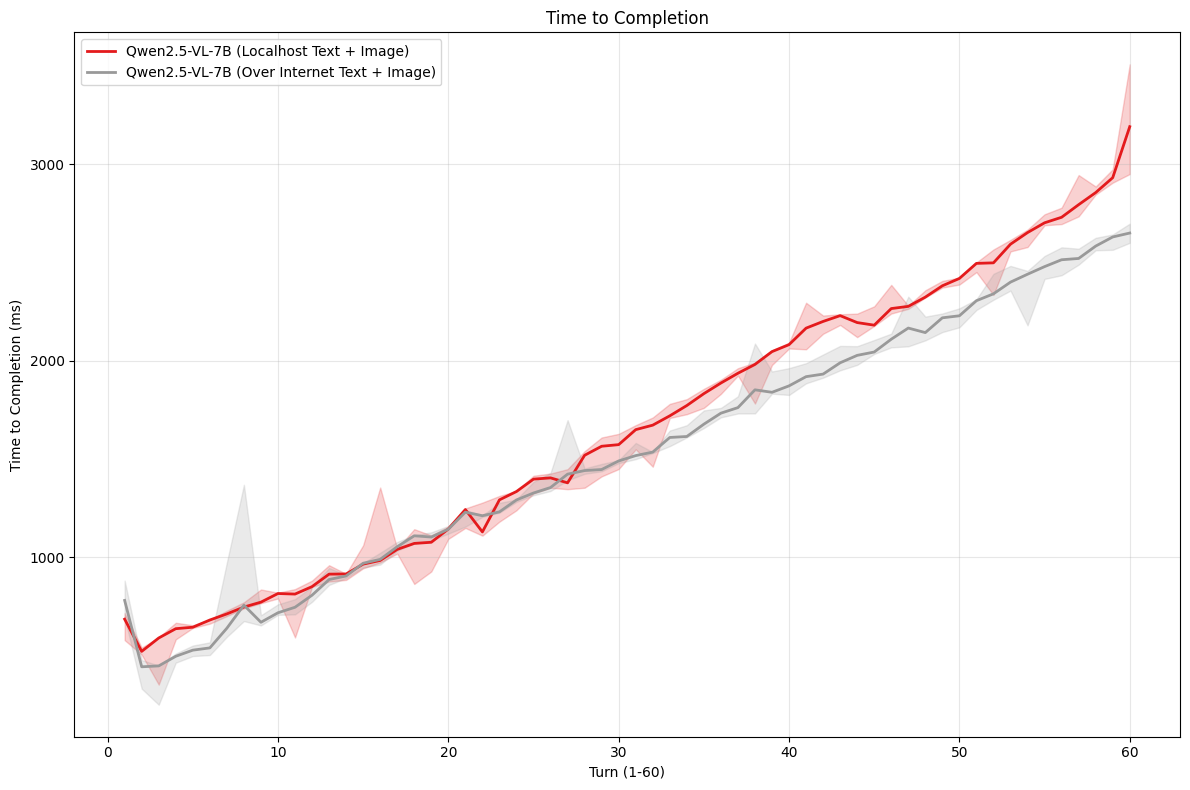

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [13]:
completion_files = [
    "results\qwen2.5_vl_7b_instruct_results_local_run_1.csv",
    "results\qwen2.5_vl_7b_instruct_results_run_1.csv",
]

completion_names = [
    "Qwen2.5-VL-7B (Localhost Text + Image)",
    "Qwen2.5-VL-7B (Over Internet Text + Image)",
]

plot_completion_curves(completion_files, completion_names, aggregation="region")

# Dense Model vs. MoE

Comparing text only due to lack of Vision MoE model at time of writing

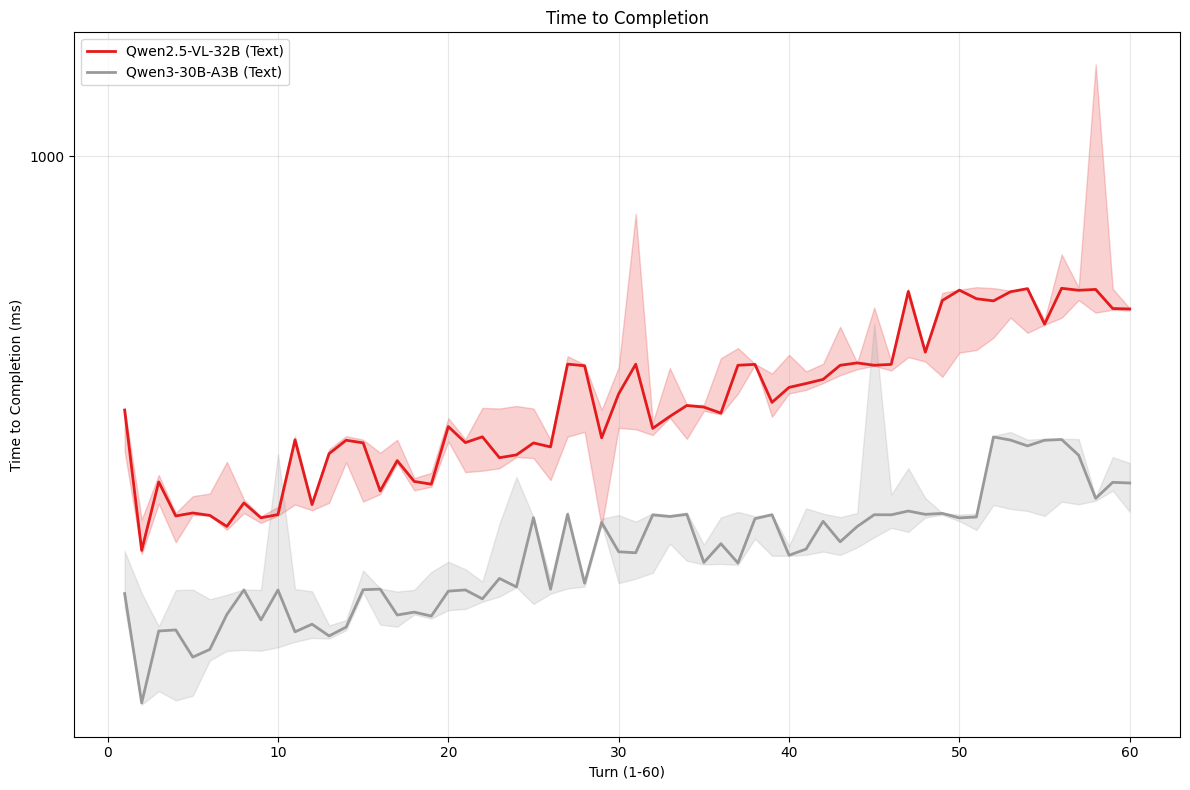

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
completion_files = [
    "results\qwen2.5_vl_32b_4x_gpu_instruct_text_only_results_run_1.csv",
    "results\qwen3_30b_4x_gpu_instruct_text_only_results_run_1.csv",
]

completion_names = ["Qwen2.5-VL-32B (Text)", "Qwen3-30B-A3B (Text)"]

plot_completion_curves(completion_files, completion_names, aggregation="region")